# LAB 1

In [173]:
import scipy
from scipy import stats

## A litle Statistics (Converting probability to sigma)

#### &nbsp;&nbsp;&nbsp; In physics, sigmas are probabilities, we want to know, given a probability, what is the associated sigma value

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp; We can integrate a continuous probability distribution to get the probability at some regions we are integrating over.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp; In python, the scipy.stats library allows us to call methods such as stats.norm.cdf() to obtain statistical cumulative probability distributions.

So, given some z, value, we can find what the the probabilty would be given some z value (sigma). (below are examples for a Gausian distribution)

In [174]:
# integral from -inf to 0 (Z=0)
scipy.stats.norm.cdf(0)

0.5

In [175]:
# probability between -inf and 0.3 (Z=0.3)
scipy.stats.norm.cdf(0.3)

0.6179114221889526

In [176]:
# probability between -inf and 0.8 (Z=0.8)
scipy.stats.norm.cdf(0.8)

0.7881446014166034

In [177]:
# prob between -inf and 3 (Z=3)
scipy.stats.norm.cdf(3)

0.9986501019683699

### Determine associated sigma values

More often, instead of being given a sigma value and asked find it's corresponding probability. We are instead given the probability and are asked to find the corresponding sigam value

In this case, we can use stats.norm.ppf() to get the sigma given a probability (below are examples for a Gausian distribution)

In [178]:
# sigma for a prob of 0.5 
scipy.stats.norm.ppf(0.5)

0.0

In [179]:
# sigma for prob of 0.84134 (from Z table)
scipy.stats.norm.ppf(0.84134)

0.9999803859660787

In [180]:
# sigma for a prob of 0.00003 [prob from -inf to -4 sigmas]
# this gave a negative sigma, this means the prob/area is to the left of the center, (ie the probability form -inf to a point 4 sigmas to the left of the center)
scipy.stats.norm.ppf(0.00003)

-4.012810811118254

## Continuous analytic distributions (Rayleigh)

In [181]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import rayleigh


In [182]:
# realization with ~100k samples (random samples)
d = rayleigh.rvs(loc = 0, scale = 0.1, size = 100000)

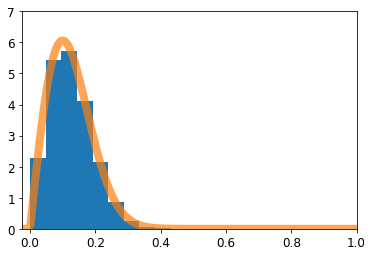

In [183]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,10, density=True)
plt.tick_params(labelsize = 12)
plt.xlim([-1,3.05])
x = np.linspace(-4,3.05,1000)
ax.plot(x,rayleigh.pdf(x,loc = 0, scale = 0.1),linewidth = 8,alpha = 0.7)
ax.set_xlim([-0.025,1])
ax.set_ylim([0,7])
plt.show()


## 3) Determining sigma value of my Rayleigh distribution

### &nbsp;&nbsp;a) Hypothetical measurement

####  &nbsp; &nbsp; &nbsp; &nbsp; choosing to be 0.02

### &nbsp;&nbsp;b) Statistical question

####  &nbsp; &nbsp; &nbsp; &nbsp; What is the probability of recieving a signal of 3.02 or higher

### &nbsp;&nbsp;c) Mathematical integral

In [184]:
theta = max(rayleigh.pdf(x,loc = 0.0, scale = 0.1))

####  &nbsp; &nbsp; &nbsp; &nbsp; $\int_{3.02}^{\infty} \frac{x}{\theta^2} e^{\frac{-x^2}{2 \theta^2}} \,dx$

this is for x greater or equal 3 in our case. NOTE:
for a Rayleigh distribuiton, the peak (max) is the value
for $\theta$ (about 60.65)

### &nbsp;&nbsp; d) Probability that the background produced the signal

In [185]:
p = rayleigh.sf(x = 0.02, loc = 0.0, scale = 0.1)
print(p)

0.9801986733067553


### &nbsp;&nbsp; e) Converting probability into an equivalent 'sigma'

In [186]:
rayleigh.ppf(p, loc = 0.0, scale = 0.1)

0.28007164579146643

## 4) Varrying sigmas for different hypothetical measurement values

In [187]:
# Prob. of seeing a signal of 0.03 or higher 
p = rayleigh.sf(x = 0.03, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	0.9559974818331
Sigma:		0.2499403295042879


In [188]:
# Prob. of seeing a signal of 0.04 or higher 
p = rayleigh.sf(x = 0.04, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	0.9231163463866358
Sigma:		0.2265154295787537


In [189]:
# Prob. of seeing a signal of 0.1 or higher 
p = rayleigh.sf(x = 0.1, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	0.6065306597126334
Sigma:		0.1365834638283265


In [190]:
# Prob. of seeing a signal of 0.2 or higher 
p = rayleigh.sf(x = 0.2, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	0.1353352832366127
Sigma:		0.053928370616746636


In [191]:
# Prob. of seeing a signal of 0.3 or higher 
p = rayleigh.sf(x = 0.3, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	0.011108996538242316
Sigma:		0.014947349108318134


In [192]:
# Prob. of seeing a signal of 0.4 or higher 
p = rayleigh.sf(x = 0.4, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	0.00033546262790251185
Sigma:		0.0025904397621902744


In [193]:
# Prob. of seeing a signal of 0.3 or higher 
p = rayleigh.sf(x = 0.6, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	1.5229979744712682e-08
Sigma:		1.7452781933370292e-05


In [194]:
# Prob. of seeing a signal of 0.3 or higher 
p = rayleigh.sf(x = 0.00001, loc = 0, scale = 0.1)
print("Probability:\t" + str(p))
print("Sigma:\t\t" + str(rayleigh.ppf(p, loc = 0.0, scale = 0.1)))

Probability:	0.999999995
Sigma:		0.6182851757981875


### &nbsp;&nbsp;Pattern

Looks like the value for sigma decreases as you go from measurement value of 0 to infinity. Sigma increases as probability tends to 1

# Non-continuous distributions (Poisson Distributions)

The Poisson distribution is a discrete probability distribution. It express the probability that a given number of events happen in a fixed interval of time/space (these events must occur with a known constant mean rate and is independent of time since the last event (WikiPedia). In short it estimates how many times an event can happen in a specified time. The poisson distribution is also the limiting case of the binomial for when the probability is very low.

In [195]:
from scipy.stats import poisson
import seaborn as sns

## The probability mass fuction for poisson:

# $P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}$

This mass function gives the probability of observing k evens in a time period given the length of length of the period and the average events per time

$ \lambda $ = (average events per time)*time period, the rate parameter (expected number of events in interval)

We'll use python's library seaborn for visualization and scipy.stats for generating needed data for the Poisson distribution

In [196]:
# generating a poisson distribution
# lamd - is the rate of which an event occurs given a time frame
# size = total time for our context
lamd = 3
P = poisson.rvs(lamd, size=1000)

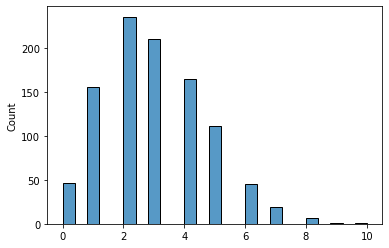

In [197]:
# visualizing the Poisson distribution
sns.histplot(P, kde = False)
plt.show()

### &nbsp;&nbsp; Statistical question pertaining our Poisson distribution

Scenario: We are out fishing and are waiting for them fishes to take bait. We notices birds flying in groups and in each of these groups there are a number of different color birds. We notice in particular a color that is eye catching to us but they are quite rare. So we set a timer and count how many of this bird type we see in 1000 seconds. After taking data, we find that on average, we see 3 three of this type in the time span of 1000 secounds.

We also noticed that when 7 or more of this type are seen within this 1000 seconds time frame, an ultra rare bird that drops you fish appears, so we want to know, what is the probabily that we see 7 or more of this bird type in 1000 seconds.

y-axis (count) is a count of the time out of 1000 seconds. So the tick 100 in the y axis means 100/1000 secounds

In [198]:
# Prob. 6 or more of this rare type bird in 1000 secounds
num_rare_birds = 7
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	0.01190450385635739
Sigma:		0.0


In [199]:
# Prob. 2 or more of this rare type bird in 1000 secounds
num_rare_birds = 2
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	0.5768099188731566
Sigma:		3.0


In [200]:
# Prob. 7 or more of this rare type bird in 1000 secounds
num_rare_birds = 7
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	0.01190450385635739
Sigma:		0.0


In [201]:
# Prob. 8 or more of this rare type bird in 1000 secounds
num_rare_birds = 8
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	0.003802992061675955
Sigma:		0.0


In [202]:
# Prob. 1 or more of this rare type bird in 1000 secounds
num_rare_birds = 1
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	0.8008517265285442
Sigma:		4.0


In [203]:
# Prob. 9 or more of this rare type bird in 1000 secounds
num_rare_birds = 9
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	0.0011024881301154815
Sigma:		0.0


In [204]:
# Prob. 10 or more of this rare type bird in 1000 secounds
num_rare_birds = 10
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	0.00029233695064733665
Sigma:		0.0


In [205]:
# Prob. 100 or more of this rare type bird in 1000 secounds
num_rare_birds = 100
prob = poisson.sf(num_rare_birds, lamd, loc = 0)
print("Probability:\t" + str(prob))
print("Sigma:\t\t" + str(poisson.ppf(prob, lamd, loc = 0.0)))

Probability:	8.413939063213629e-114
Sigma:		0.0


#### Possion distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

 &nbsp;&nbsp; For something like this, I would imgagine our instruments for making measurements must be percise. Otherwise small fluatuations may lead as to differences in results.

#### While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.

 &nbsp;&nbsp; There will still be parameters like the mean that are not discrete, which is okay because parameters such as this are not what tell us probabilities, which is what we are interested in. Looking at the plot we made above, the y-axis gives a count of secounds we see some number of the rare birds. In a sense, if we divide the values of y-axis by 1000, we get number of birds vs probability plot. Since the x axis is a count of the number of the rare bird we might see. Though the number of birds we see is discrete, when we translate our data into plots, our reprentation can give rise to parameters like the mean of the distribution to &nbsp;&nbsp;be non-discrete. However this is just the representation of it and when we analyze the data, we don't look at the mean just as a reference.